# ANZ virtual program - Data Analysis

## Exploratory Data Analysis

1. Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

2. Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

3. Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

4. For a challenge – what insights can you draw from the location information provided in the dataset?

5. Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [2]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

In [3]:
trans = pd.read_excel('/virtual program/ANZ/ANZ synthesised transaction dataset.xlsx')

In [4]:
trans.head(20)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
trans.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

### Variable understanding

- I don't know the meanings:
    - status
    - card_present_flag
    - bpay_biller_code
    - extraction(datetime)
- Customers Information:
    - account
    - first_name
    - customer_id
    - gender
    - age
    - country:Australia
    - long_lat
- Transaction Information:
    - currency:AUD
    - txn_description
    - balance
    - date
    - amount
    - transaction_id
    - movement 
- If the trans happened in a merchant:
    - merchant_id
    - merchant_code
    - merchant_suburb
    - merchant_state
    - merchant_long_lat

#### Date
- daily
- day of week
- weekly
- monthly

In [143]:
# day of week
trans['weekday'] = trans['date'].dt.weekday
# weekly
trans['week'] = trans['date'].dt.week
# monthly
trans['month'] = trans['date'].dt.month

#### Customer Information

- account
- first_name
- customer_id
- gender
- age
- country:Australia
- long_lat

In [179]:
# account: how many account had transactions in this period?
account = trans['account'].value_counts()
print('The number of customers in this transactions dataset is', len(account))

The number of customers in this transactions dataset is 100


Text(0.5, 1.0, 'The number of daily account with transactions in the past 3 months')

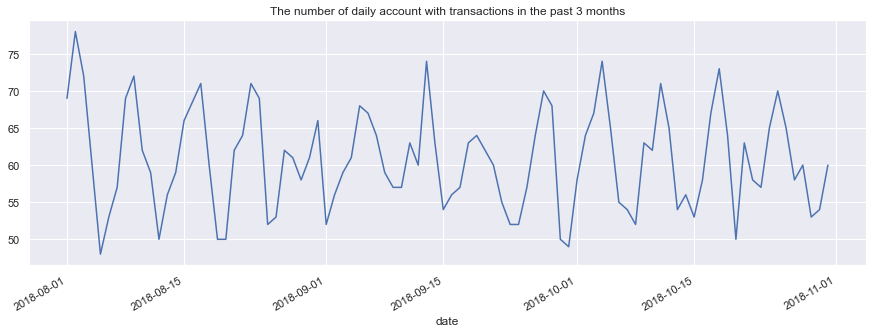

In [138]:
# account
# daily_account
account_daily = trans.groupby(['date'])['account'].nunique()
plt.figure(figsize=(15,5))
account_daily.plot()
plt.title('The number of daily account with transactions in the past 3 months')

Text(0.5, 1.0, 'The number of account with transactions in the past 3 months by weekday')

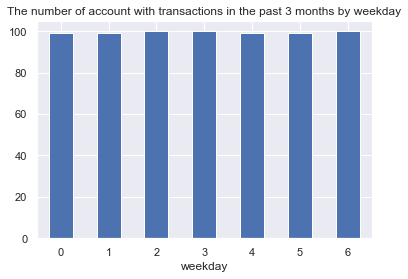

In [151]:
# account
# weekday_account
account_weekday = trans.groupby(['weekday'])['account'].nunique()
account_weekday.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('The number of account with transactions in the past 3 months by weekday')

Text(0.5, 1.0, 'The number of weekly account with transactions in the past 3 months')

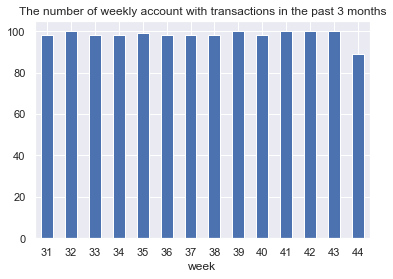

In [146]:
# account
# weekly_account
account_weekly = trans.groupby(['week'])['account'].nunique()
account_weekly.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('The number of weekly account with transactions in the past 3 months')

Text(0.5, 1.0, 'The number of monthly account with transactions in the past 3 months')

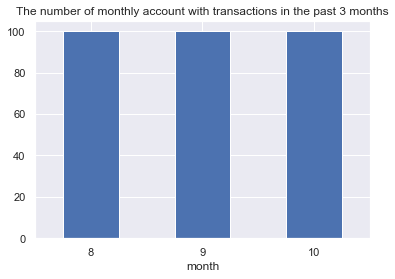

In [128]:
# account
# monthly_account
account_monthly = trans.groupby(['month'])['account'].nunique()
account_monthly.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('The number of monthly account with transactions in the past 3 months')

age > 60 is  3 and the corresponding number of transactions is  224


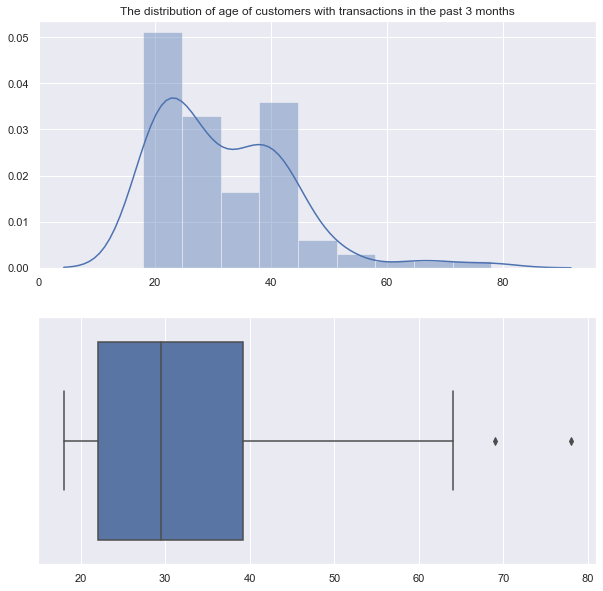

In [129]:
# age
age = trans.groupby(['account'])['age'].mean().tolist()
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(age)
plt.title('The distribution of age of customers with transactions in the past 3 months')
plt.subplot(2,1,2)
sns.boxplot(age)
print('age > 60 is ',sum(i > 60 for i in age), 'and the corresponding number of transactions is ', sum(trans['age']>60))

From the age distribution, we can see that, about 75% of customers are below 40 years old. The number of customers above 60 years old is only 3(3%) with 224 transactions(224/12043=1.86%).

Text(0.5, 1.0, 'The distribution of gender of customers with transactions in the past 3 months')

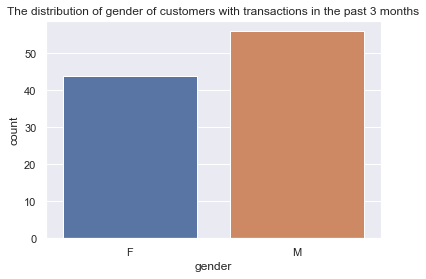

In [389]:
# gender
gender = trans.groupby(['account'])['gender'].min()
sns.countplot(gender)
plt.title('The distribution of gender of customers with transactions in the past 3 months')

In [ ]:
long = []
lat = []
for long_lat in trans['long_lat'].unique():
    long.append(long_lat.split(' ')[0])
    lat.append(long_lat.split(' ')[1])
    

In [258]:
# check a wrong long_lat
# print(max(lat))
#long[lat.index('-573.00')]
# lont_lat: '255.00 -573.00'
trans[trans['long_lat'] =='255.00 -573.00']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,weekday,week
47,authorized,0.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,NaN,Daniel,1290.08,2018-08-01,M,22,Sydney,NSW,2018-08-01T10:27:08.000+0000,31.62,826f09d26daf4b7282f597cabfecaf81,Australia,CUS-1617121891,151.21 -33.87,debit,8,2,31
51,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,1195.08,2018-08-01,M,22,NaN,NaN,2018-08-01T11:00:00.000+0000,95.00,62e49c215d7e45609556936fd7e860ce,Australia,CUS-1617121891,NaN,debit,8,2,31
99,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,1162.08,2018-08-01,M,22,NaN,NaN,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,NaN,debit,8,2,31
392,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,4490.85,2018-08-03,M,22,NaN,NaN,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,Australia,CUS-1617121891,NaN,credit,8,4,31
473,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,NaN,Daniel,4473.55,2018-08-04,M,22,Oakleigh,VIC,2018-08-04T09:25:56.000+0000,17.30,9467d030d2b84b4dbc419e8230fd9361,Australia,CUS-1617121891,145.09 -37.9,debit,8,5,31
477,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,NaN,Daniel,4456.55,2018-08-04,M,22,Oakleigh,VIC,2018-08-04T10:06:09.000+0000,17.00,9bf5a9c4627f4b84b16d226434842b05,Australia,CUS-1617121891,145.09 -37.9,debit,8,5,31
500,authorized,0.0,NaN,ACC-2901672282,AUD,255.00 -573.00,POS,e888ea98-4249-485d-a03d-531742ecbfad,NaN,Daniel,4381.54,2018-08-04,M,22,Bella Vista,NSW,2018-08-04T13:57:53.000+0000,75.01,ffb5612974c8491aa0879d50c642d853,Australia,CUS-1617121891,150.95 -33.74,debit,8,5,31
531,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,POS,e957b3e1-e8d7-49a4-98a9-e5feba8b1a74,NaN,Daniel,4326.96,2018-08-04,M,22,Bondi Junction,NSW,2018-08-04T19:27:41.000+0000,54.58,fb1537fbbce94c65af282b97ecbba751,Australia,CUS-1617121891,151.25 -33.89,debit,8,5,31
549,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,3bd6a59a-b049-4f8c-8ba0-c4285f8f5319,NaN,Daniel,4313.91,2018-08-04,M,22,Melbourne,VIC,2018-08-04T21:44:51.000+0000,13.05,4c65c690d26f400996ee8358d7c4fed8,Australia,CUS-1617121891,144.97 -37.81,debit,8,5,31
550,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,1755f299-52e5-4489-a5ce-d86c236a351c,NaN,Daniel,4164.00,2018-08-04,M,22,St Leonards,NSW,2018-08-04T21:49:42.000+0000,149.91,07dfca1297364718bd195043093ae430,Australia,CUS-1617121891,151.19 -33.82,debit,8,5,31


In [379]:
# long_lat
import folium
m = folium.Map(location=[-27.67, 114.41])
for i in range(len(long)):
    folium.Circle(radius=50,location=[lat[i],long[i]],color='crimson').add_to(m)
m

#### Transaction Information:
- currency:AUD
- long_lat
- txn_description
- balance
- date
- amount
- transaction_id
- movement 

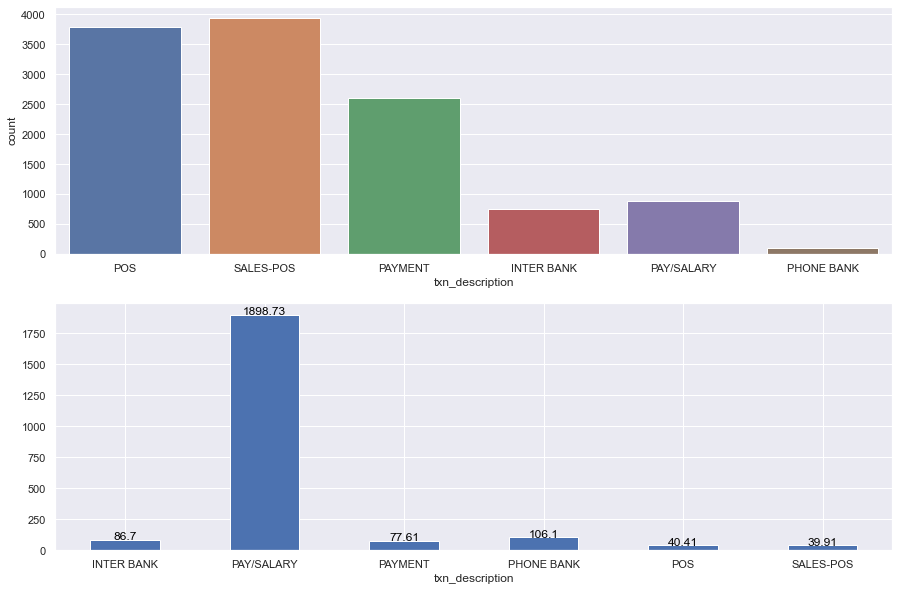

In [279]:
# txn_description
trans['txn_description'].value_counts()
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(trans['txn_description'])
# txn_description & amount
plt.subplot(2,1,2)
txn_amount = trans.groupby(['txn_description'])['amount'].mean()
txn_amount.plot(kind='bar')
plt.xticks(rotation=360)
for i, v in enumerate(txn_amount):
    plt.text(i,v,round(v,2),color='black',ha='center')

About 62% of transactions happened in POS and SALES-POS, which means that the customers spent money in a merchant.

The summary of the transaction amount is
 count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

The number of amount above 100 is 1943 , and the ratio is 0.16


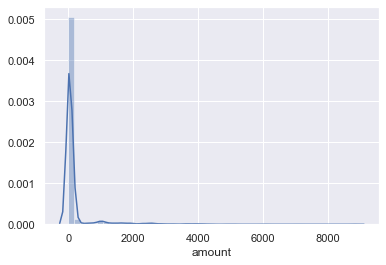

In [197]:
# amount
# summary
print('The summary of the transaction amount is\n',trans['amount'].describe())
sns.distplot(trans['amount'])
# amount above 100
amount_above100 = trans[trans['amount']>100]
print('\nThe number of amount above 100 is',len(amount_above100),', and the ratio is',round(len(amount_above100)/len(trans),2))

The average weekly amount is weekday
0    56.73
1    55.95
2    50.22
3    52.88
4    47.67
5    54.42
6    53.02
Name: amount, dtype: float64


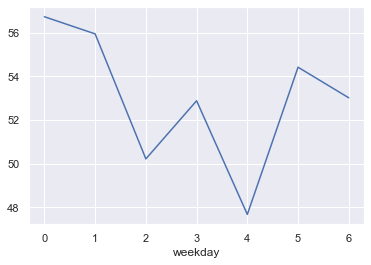

In [382]:
# date
# dayofweek
#amount_weekday = trans[trans['txn_description']!='PAY/SALARY'].groupby(['weekday'])['amount'].mean()
amount_weekday = trans.groupby(['weekday'])['amount'].mean()
print('The average weekly amount is',round(amount_weekday,2))
amount_weekday.plot()

The average weekly amount is week
31    151.32
32    191.74
33    180.22
34    189.80
35    162.71
36    194.40
37    186.91
38    198.12
39    187.50
40    179.01
41    174.72
42    217.29
43    196.04
44    248.73
Name: amount, dtype: float64


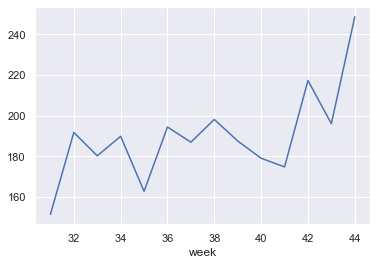

In [175]:
# date
# weekly
amount_weekly = trans.groupby(['week'])['amount'].mean()
print('The average weekly amount is',round(amount_weekly,2))
amount_weekly.plot()

In [173]:
# date
# monthly
amount_monthly = trans.groupby(['month'])['amount'].mean()
print('The average monthly amount is\n',round(amount_monthly,2))

The average monthly amount is month
8     185.12
9     182.05
10    196.43
Name: amount, dtype: float64


In [188]:
# customers
amount_customers = trans.groupby(['account','first_name'])['amount'].mean()
print(amount_customers.nlargest(10))

account         first_name
ACC-4059612845  Jonathan      693.632903
ACC-3317636250  Kenneth       567.614500
ACC-1523339231  Tim           515.583846
ACC-3021093232  Melissa       497.669474
ACC-2259139624  Cindy         489.220980
ACC-2650850707  Brian         448.658413
ACC-1217063613  Kimberly      426.108800
ACC-1199531521  Billy         418.742468
ACC-3881031190  Richard       392.840811
ACC-2231965366  Linda         375.681089
Name: amount, dtype: float64


In [130]:
# transaction_id
# summary
print('The total number of transactions in the past 3 months is',len(trans['transaction_id']))

The total number of transactions in the past 3 months is 12043


The average transactions daily is 132.34


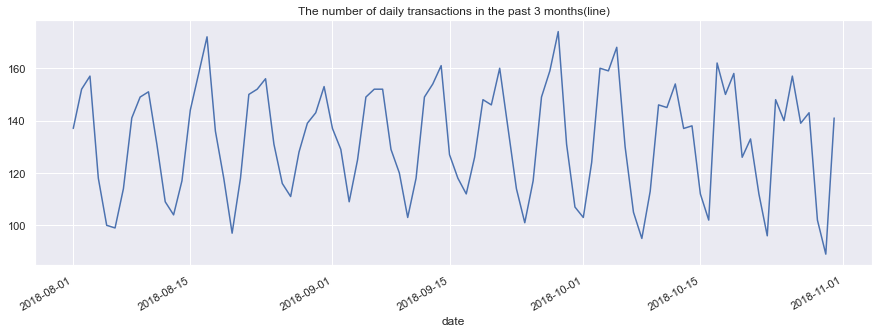

In [158]:
# transaction_id
# date
# daily_trans
trans_daily = trans.groupby(['date'])['transaction_id'].count()
plt.figure(figsize=(15,5))
trans_daily.plot()
plt.title('The number of daily transactions in the past 3 months(line)')
print('The average transactions daily is',round(trans_daily.mean(),2))

Text(0.5, 1.0, 'The average number of weekday transactions in the past 3 months(line)')

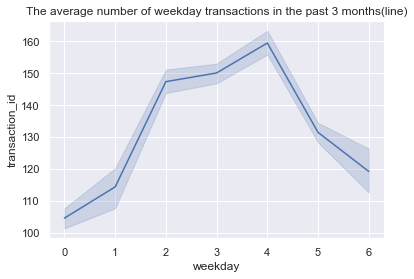

In [405]:
# date
# dayofweek_trans
trans_weekday = pd.DataFrame(trans.groupby(['date','weekday'])['transaction_id'].count())
trans_weekday.reset_index(inplace=True)
sns.lineplot(x='weekday',y='transaction_id',data=trans_weekday)
plt.title('The average number of weekday transactions in the past 3 months(line)')

#print('The average transactions weekday is',round(trans_weekday.mean(),2))
#print(trans_weekday)

The average transactions weekly is 860.21


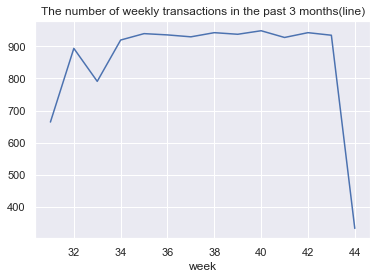

In [160]:
# date
# weekly_trans
trans_weekly = trans.groupby(['week'])['transaction_id'].count()
trans_weekly.plot()
plt.title('The number of weekly transactions in the past 3 months(line)')
print('The average transactions weekly is',round(trans_weekly.mean(),2))

month
8     3943
9     4013
10    4087
Name: transaction_id, dtype: int64
The average transactions monthly is 4014.33


Text(0.5, 1.0, 'The number of monthly transactions in the past 3 months')

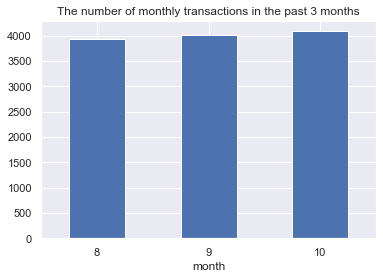

In [134]:
# transaction_id
# date
# monthly_trans
trans_monthly = trans.groupby(['month'])['transaction_id'].count()
print(trans_monthly)
print('The average transactions monthly is',round(trans_monthly.mean(),2))
trans_monthly.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('The number of monthly transactions in the past 3 months')

In [171]:
# transaction_id
# customers
trans_account = trans.groupby(['account','first_name'])['transaction_id'].count()
print('The accounts with TOP10 number of transactions are\n',trans_account.nlargest(10))

The accounts with TOP10 number of transactions are
 account         first_name
ACC-1598451071  Diana         578
ACC-1222300524  Michael       303
ACC-182446574   Tonya         292
ACC-4258502723  Kimberly      260
ACC-1037050564  Rhonda        259
ACC-3485804958  Jessica       245
ACC-2673069055  Richard       239
ACC-2890243754  Joseph        239
ACC-1903037542  Jeffrey       233
ACC-3481401842  Tiffany       230
Name: transaction_id, dtype: int64


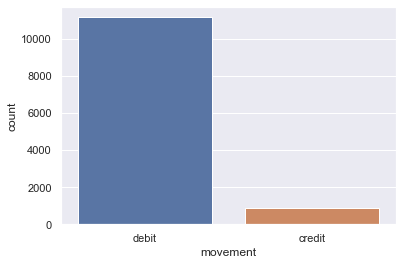

In [136]:
# movement
trans['movement'].value_counts()
sns.countplot(trans['movement'])

Mostly, the transactions happen with debit card. There are some reasons: customers are likely to spend money with debit; merchant are likely to accept debit card; the transactions with salary don't accept debit card.

#### merchant:
- merchant_id
- merchant_code
- merchant_suburb
- merchant_state
- merchant_long_lat

In [211]:
# merchant:top10 count
merchant_count = trans.groupby(['merchant_state','merchant_suburb'])['transaction_id'].count()
print(merchant_count.nlargest(10))

merchant_state  merchant_suburb
VIC             Melbourne          255
NSW             Sydney             233
QLD             Southport           82
                Brisbane City       79
NSW             Chatswood           55
WA              Perth               45
SA              Adelaide            44
QLD             Broadbeach          41
SA              Mount Gambier       41
NSW             Parramatta          39
Name: transaction_id, dtype: int64


In [212]:
# merchant:top10 amount
merchant_amount = trans.groupby(['merchant_state','merchant_suburb'])['amount'].mean()
print(merchant_amount.nlargest(10))

merchant_state  merchant_suburb
WA              Pantapin           829.765000
NSW             Gladesville        734.100000
VIC             West Wodonga       559.330000
QLD             South Brisbane     559.075238
NT              Parap              553.918333
WA              Lowlands           524.580000
QLD             Mossman Gorge      501.670000
NSW             Fairlight          496.760000
ACT             Deakin             491.506667
NSW             Enfield            491.140000
Name: amount, dtype: float64


## Predictive Analysis

- Goal: identify the annual salary for each customer

- Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

- Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

- How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

- For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

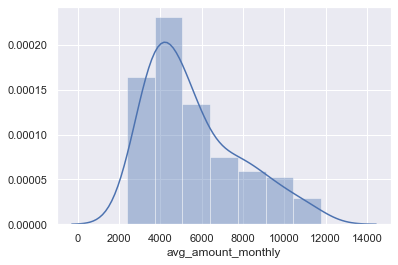

In [407]:
# construct the customer&salary dataset
customer_group = pd.DataFrame(trans.groupby(['account','txn_description']).agg({'age':'min','amount':'sum','transaction_id':'count'}))
customer_group.reset_index(inplace=True)
customer_group['amount'] = customer_group['amount']/3 # average monthly amount
customer_group['transaction_id'] = customer_group['transaction_id']/3 # average monthly transactions count
customer_group.rename(columns={'amount':'avg_amount_monthly','transaction_id':'trans_count_monthly'},inplace=True)

# extract the salary subset
salary = customer_group[customer_group['txn_description']=='PAY/SALARY']
sns.distplot(salary['avg_amount_monthly'])

In [331]:
# extract the other transactions subset
others = customer_group[customer_group['txn_description']!='PAY/SALARY']
others_avg = others.groupby(['account']).agg({'avg_amount_monthly':'mean','trans_count_monthly':'mean'})
others_avg.reset_index(inplace=True)

# merge salary & others_avg
# variable: monthly salary, monthly salary transcount, monthly other_transtype amount, monthly other_transtype transcount
salary_new = salary.merge(others_avg,how='left',on='account')
salary_new.drop(['txn_description'],axis=1,inplace=True)
salary_new.rename(columns={'avg_amount_monthly_x':'monthly_salary','trans_count_monthly_x':'monthly_salary_transcount','avg_amount_monthly_y':'monthly_others_amount','trans_count_monthly_y':'monthly_others_transcount'},inplace=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

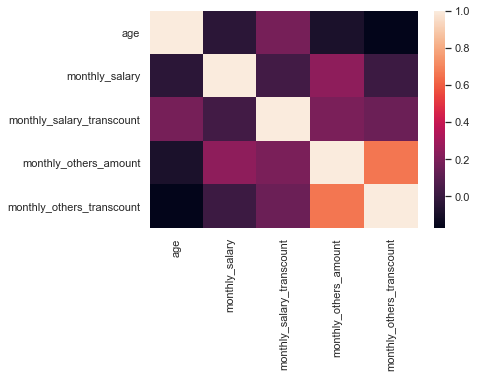

In [341]:
corr_salary = salary_new.corr()
sns.heatmap(corr_salary)
plt.xticks(rotation=90)

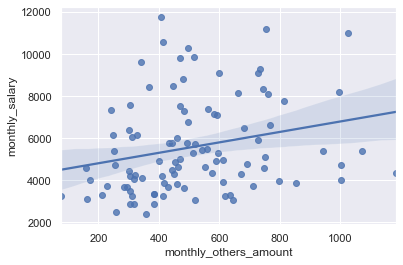

In [340]:
sns.regplot(x='monthly_others_amount',y='monthly_salary',data=salary_new)

0.10304662610422355
The coefficients are:
 ['age', 'monthly_others_amount', 'monthly_others_transcount'] 
 [ -9.2590484    4.31284909 -96.51472329]
The intercept is:
 4619.724795219244


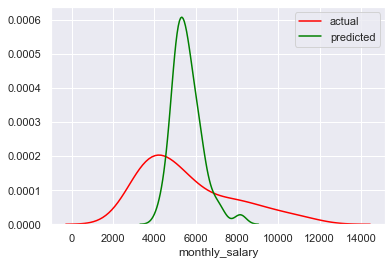

In [361]:
# modelling: Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = salary_new.drop(['account','monthly_salary','monthly_salary_transcount'],axis=1)
y = salary_new['monthly_salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg_linear = LinearRegression()
reg_linear.fit(X,y)
score_linear = reg_linear.score(X,y)
#reg_linear.fit(X_train,y_train)
#score_linear = reg_linear.score(X_test,y_test)
print(score_linear)
print('The coefficients are:\n',list(X.columns),'\n',reg_linear.coef_)
print('The intercept is:\n',reg_linear.intercept_)

# actrual vs predict plot
ax1 = sns.distplot(y,color='red',hist=False,label='actual')
sns.distplot(reg_linear.predict(X),hist=False,ax=ax1,color='green',label='predicted_linear')

-0.8155639186200079


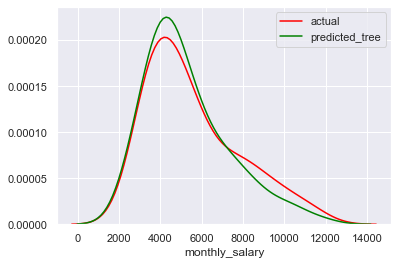

In [371]:
# modelling: decission tree
from sklearn import tree
X = salary_new.drop(['account','monthly_salary','monthly_salary_transcount'],axis=1)
y = salary_new['monthly_salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

reg_tree = tree.DecisionTreeRegressor()
reg_tree.fit(X_train,y_train)
score_tree = reg_tree.score(X_test,y_test)
#reg_tree.fit(X_train,y_train)
#score_tree = reg_tree.score(X_test,y_test)
print(score_tree)

# actrual vs predict plot
ax2 = sns.distplot(y,color='red',hist=False,label='actual')
sns.distplot(reg_tree.predict(X),hist=False,ax=ax2,color='green',label='predicted_tree')